# Multiple Random Variables and Joint Distributions

<a id='contents'></a>

Be sure to import Symbulate using the following commands.
<a id='joint'></a>

In [1]:
from symbulate import *
%matplotlib inline

### Simulating pairs (or tuples) of values with `&`

Joining `X` and `Y` with an ampersand `&`  and calling `.sim()` simultaneously simulates the pair of `(X, Y)` values for each simulated outcome of the probability space.  The simulated results can be used to approximate the joint distribution of `X` and `Y` which describes the possible pairs of values and their relative likelihoods.  Likewise, tuples of values of multiple random variables can be simulated simultaneously using the ampersand `&`. Simulation tools like `.sim()`, `.tabulate()`, etc work as before.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls.

In [3]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate(normalize=True)

"(2, 1)",0.0286
"(3, 2)",0.0574
"(4, 2)",0.0289
"(4, 3)",0.0539
"(5, 3)",0.0537
"(5, 4)",0.0574
"(6, 3)",0.0266
"(6, 4)",0.0548
"(6, 5)",0.0585
"(7, 4)",0.0532
"(7, 5)",0.0596


<a id='plot'></a>

Intuitvely, a collection of random variables are independent if knowing the values of some does not influence the joint distribution of the others.  Random variables $X$ and $Y$ are **independent** if and only if the joint distribution factors into the product of the  corresponding marginal distributions.  That is, for independent RVs the joint distribution is fully specified by the marginal distributions.

In Symbulate, independence of distributions is represented by the asterisks `*`.  The `*` syntax reflects that under independence joints objects (i.e. cdf, pdf) are products of the corresponding marginal objects.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.

In [6]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0, 1) * Uniform(0, 1))  # see below for notes on "unpacking"
(X & Y & Z).sim(10000)

0,"(2, -0.6027736499852608, 0.37206604884568517)"
1,"(2, -0.4275860222383853, 0.4569055385370363)"
2,"(1, 0.15526346946880312, 0.9712672434347334)"
3,"(3, -1.3163450889685577, 0.6076184513236067)"
4,"(3, -0.0328089274378655, 0.8343836468385954)"
5,"(2, 0.5389112649637529, 0.20529729071052416)"
6,"(1, 0.32128993163999925, 0.42263204518331254)"
7,"(2, -0.832383503062737, 0.12099586542373231)"
8,"(3, 0.8145959203095892, 0.2382660307823692)"
...,...
9999,"(3, 0.03818371315600435, 0.28040316406425403)"


*Example.* Let $X$ and $Y$ be i.i.d. Normal(0, 1) random variables.

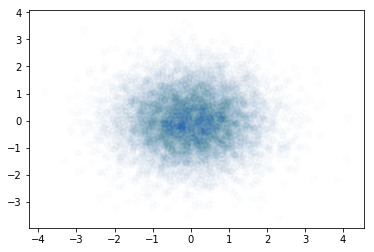

In [8]:
X, Y = RV(Normal(0,1) ** 2)  # see below for notes on "unpacking"
(X & Y).sim(10000).plot(alpha = 0.01)

<a id='rv'></a>

### Marginal distributions

Each component of a random vector is a random variable, so unpacking or indexing using brackets produces random variables which can be manipulated accordingly to describe their marginal distribution.

When multiple random variables are simulated, applying `.mean()`, `.var()`, or `.sd()` returns the marginal means, variances, and standard deviations, respectively, of each of the random variables involved.

*Example.*  A vector of independent random variables.

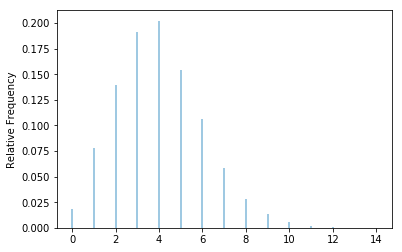

In [16]:
X = RV(Binomial(5, 0.5) * Normal(0, 1) * Poisson(4))
X[2].sim(10000).plot()

In [17]:
X.sim(10000).mean()

(2.509, -0.007249895948954117, 4.0015)

In [18]:
X.sim(10000).sd()

(1.1279847472372944, 1.0039291445416711, 1.9710758077760724)

<a id='cov'></a>

In [25]:
(X & Y & X+Y).sim(10000).corr()

array([[ 1.        , -0.24955397,  0.25710783],
       [-0.24955397,  1.        ,  0.87164496],
       [ 0.25710783,  0.87164496,  1.        ]])

<a id='transform'></a>

*Example.* Let $X$ and $Y$ be i.i.d. Exponential(1) random variables.  Produce a plot of the approximate joint distribution of $W = X+ Y$ and $Z = X / W$.

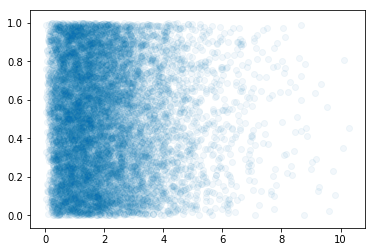

In [28]:
X, Y = RV(Exponential(1)**2)
W = X + Y
Z = X / W
(W & Z).sim(10000).plot(alpha = 0.05)

## A caution about working with multiple random variables... Again!

In order to manipulate multiple random variables simulultaneously, they must be defined on the sample probability space.  Otherwise, it would not be possible to determine the *relationship* between the random variables.  Note that the following code would produce an error because the random variables are not explicitly defined on the same probability space.  In particular, Symbulate has no way of determining the joint distribution of $X$ and $Y$.  The error can be fixed by adding `X, Y = AssumeIndependent(X, Y)` before the last line.

```
X = RV(Poisson(2.3))  
Y = RV(Poisson(1.7))  
(X + Y).sim(10000).plot()  
```